In [1]:
import argparse
import functools
import logging
import os
from pathlib import Path

import h5py
import pymongo
from joblib import Parallel, delayed

from data_lake.constants import DB_ADDRESS, TARGET_DB
from data_lake.lidc.constants import ClusterLevelInfo, CollectionName, HFileKey, ImageLevelInfo
from data_lake.lidc.enums import NoduleAttribute, NoduleAttributeCluster
from trainer.common.utils.utils_logger import setup_logger
from trainer.common.utils.utils_vis import save_plot

In [2]:
client = pymongo.MongoClient(DB_ADDRESS)

In [ ]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.2
query = {
    "c_spiculation_logistic": {"$lte": degree},
    "c_lobulation_logistic": {"$gte": 1 - degree},
    "num_mask": {"$gte": 1},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

In [23]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )

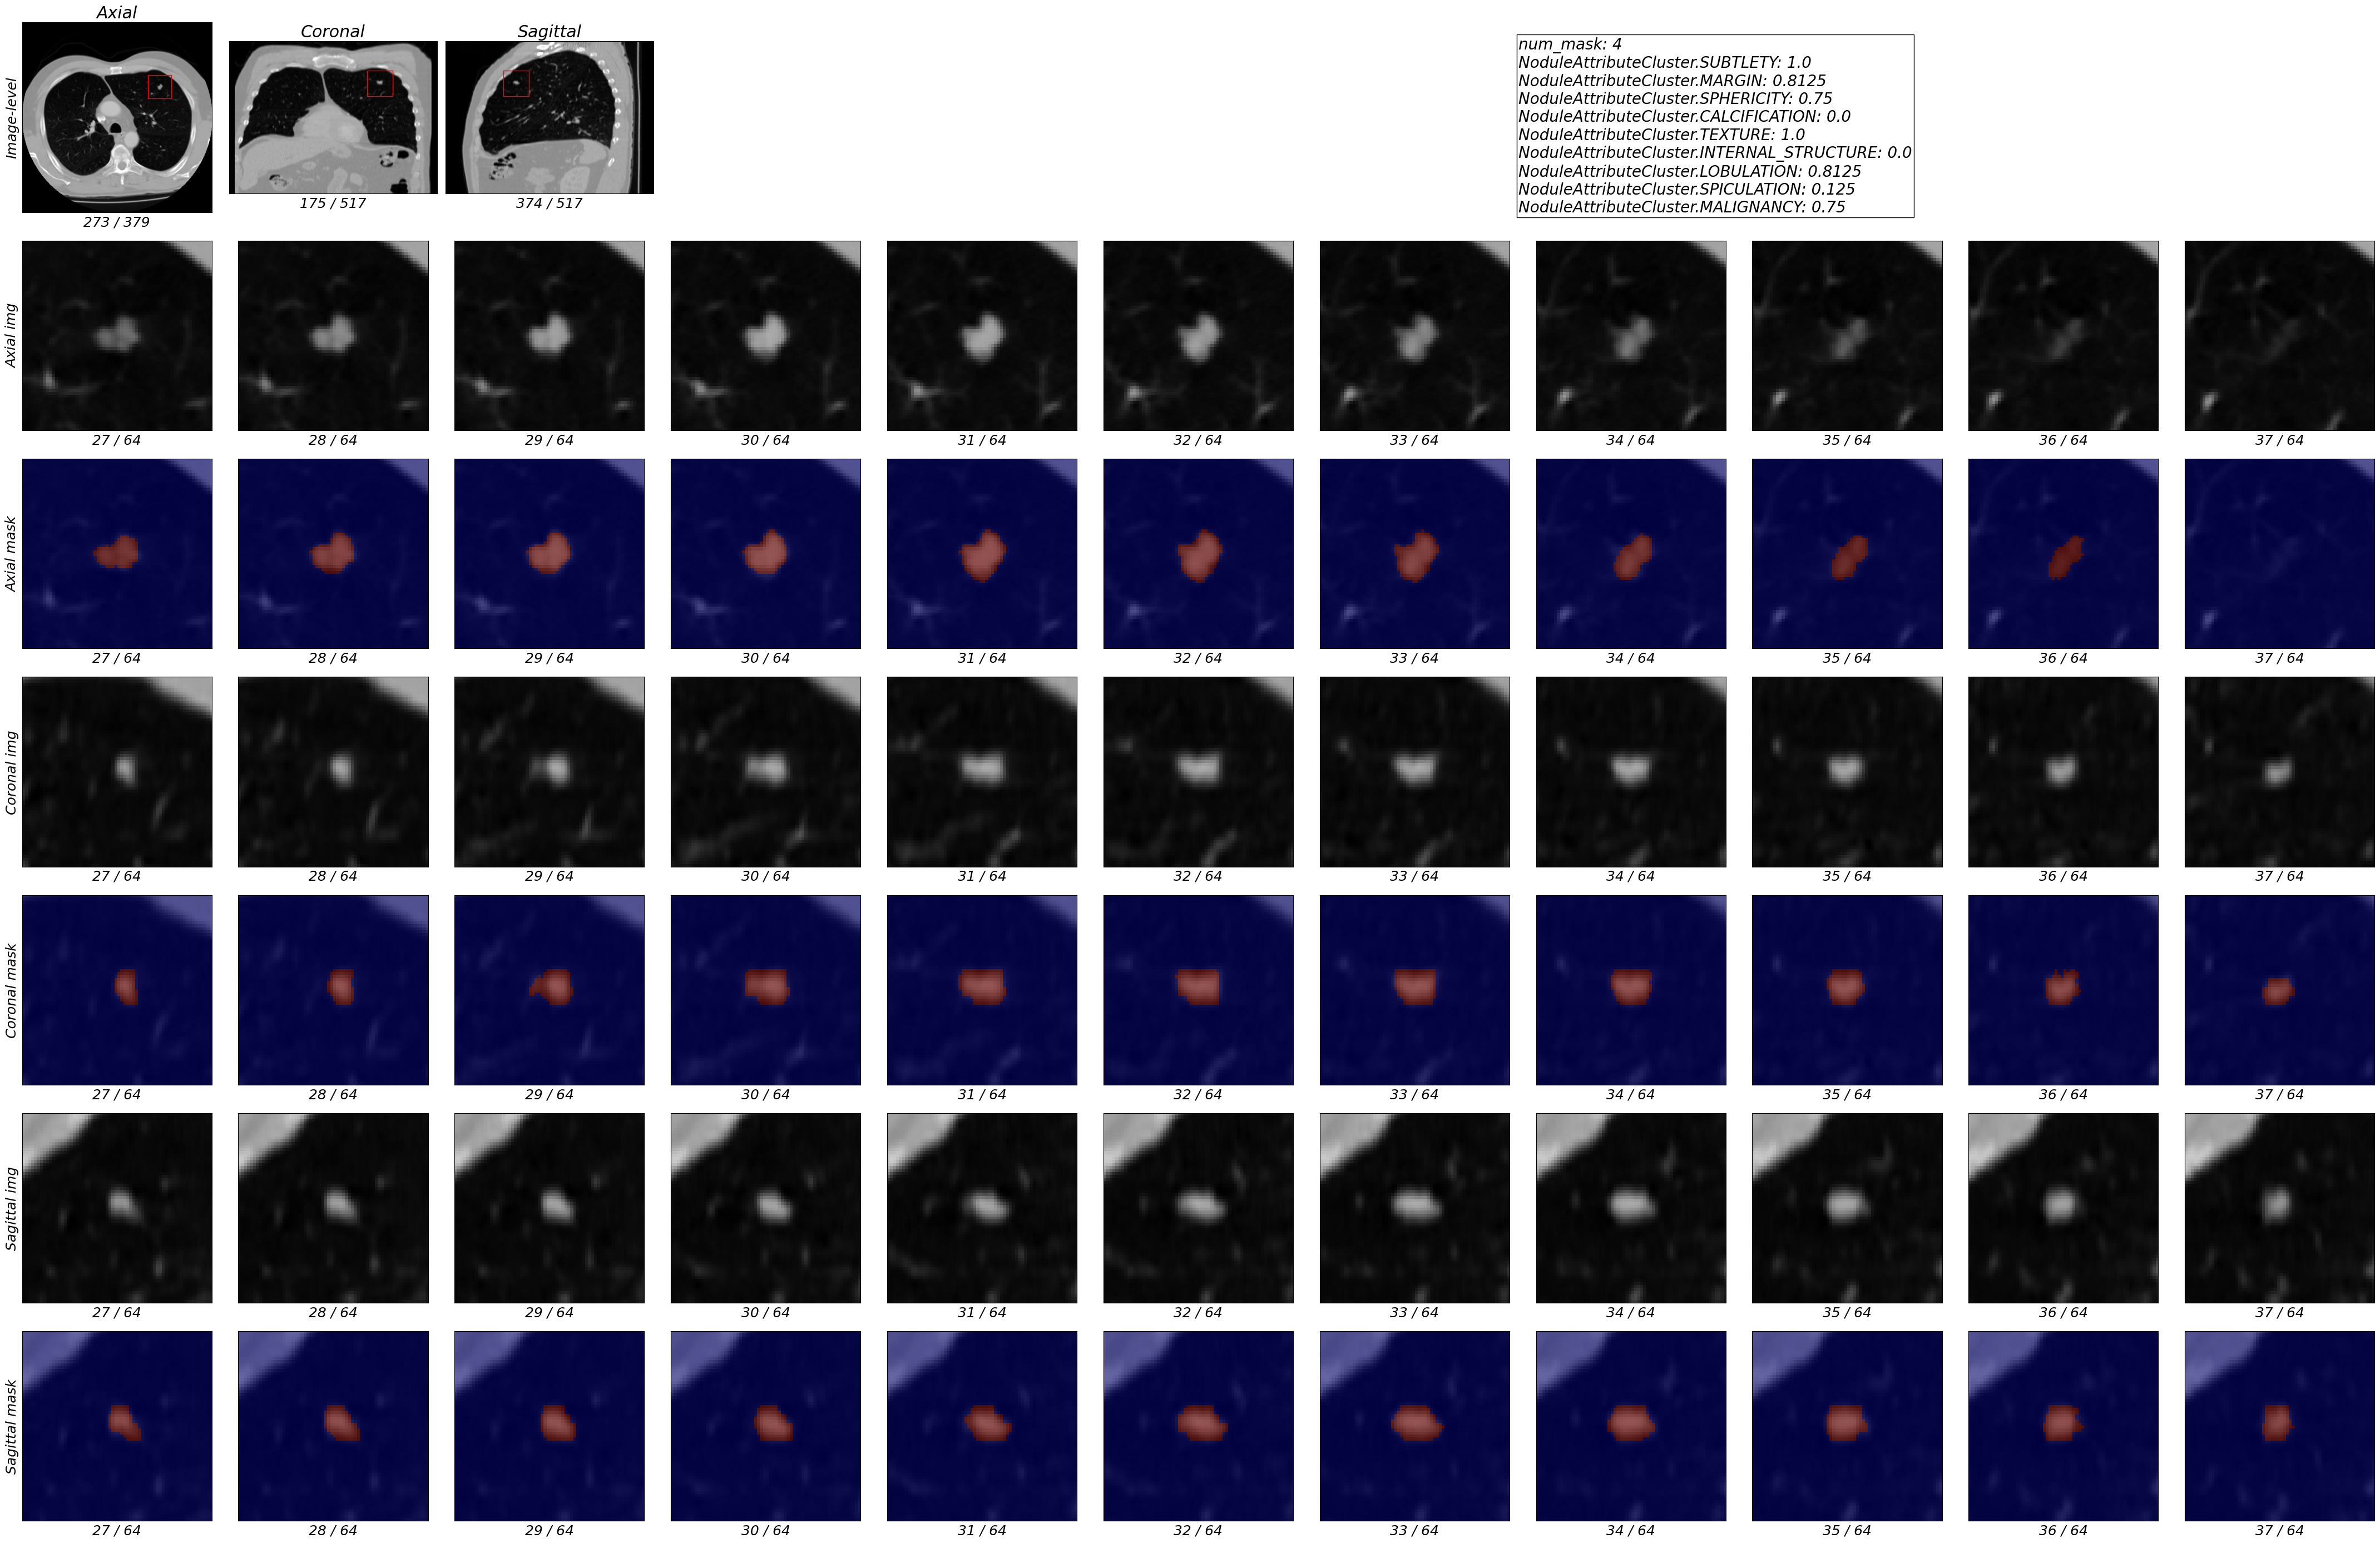

In [24]:
fig

In [29]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.9
query = {
    "c_malignancy_logistic": {"$gte": degree},
    "c_spiculation_logistic": {"$gte": degree},
    "num_mask": {"$gte": 3},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

8


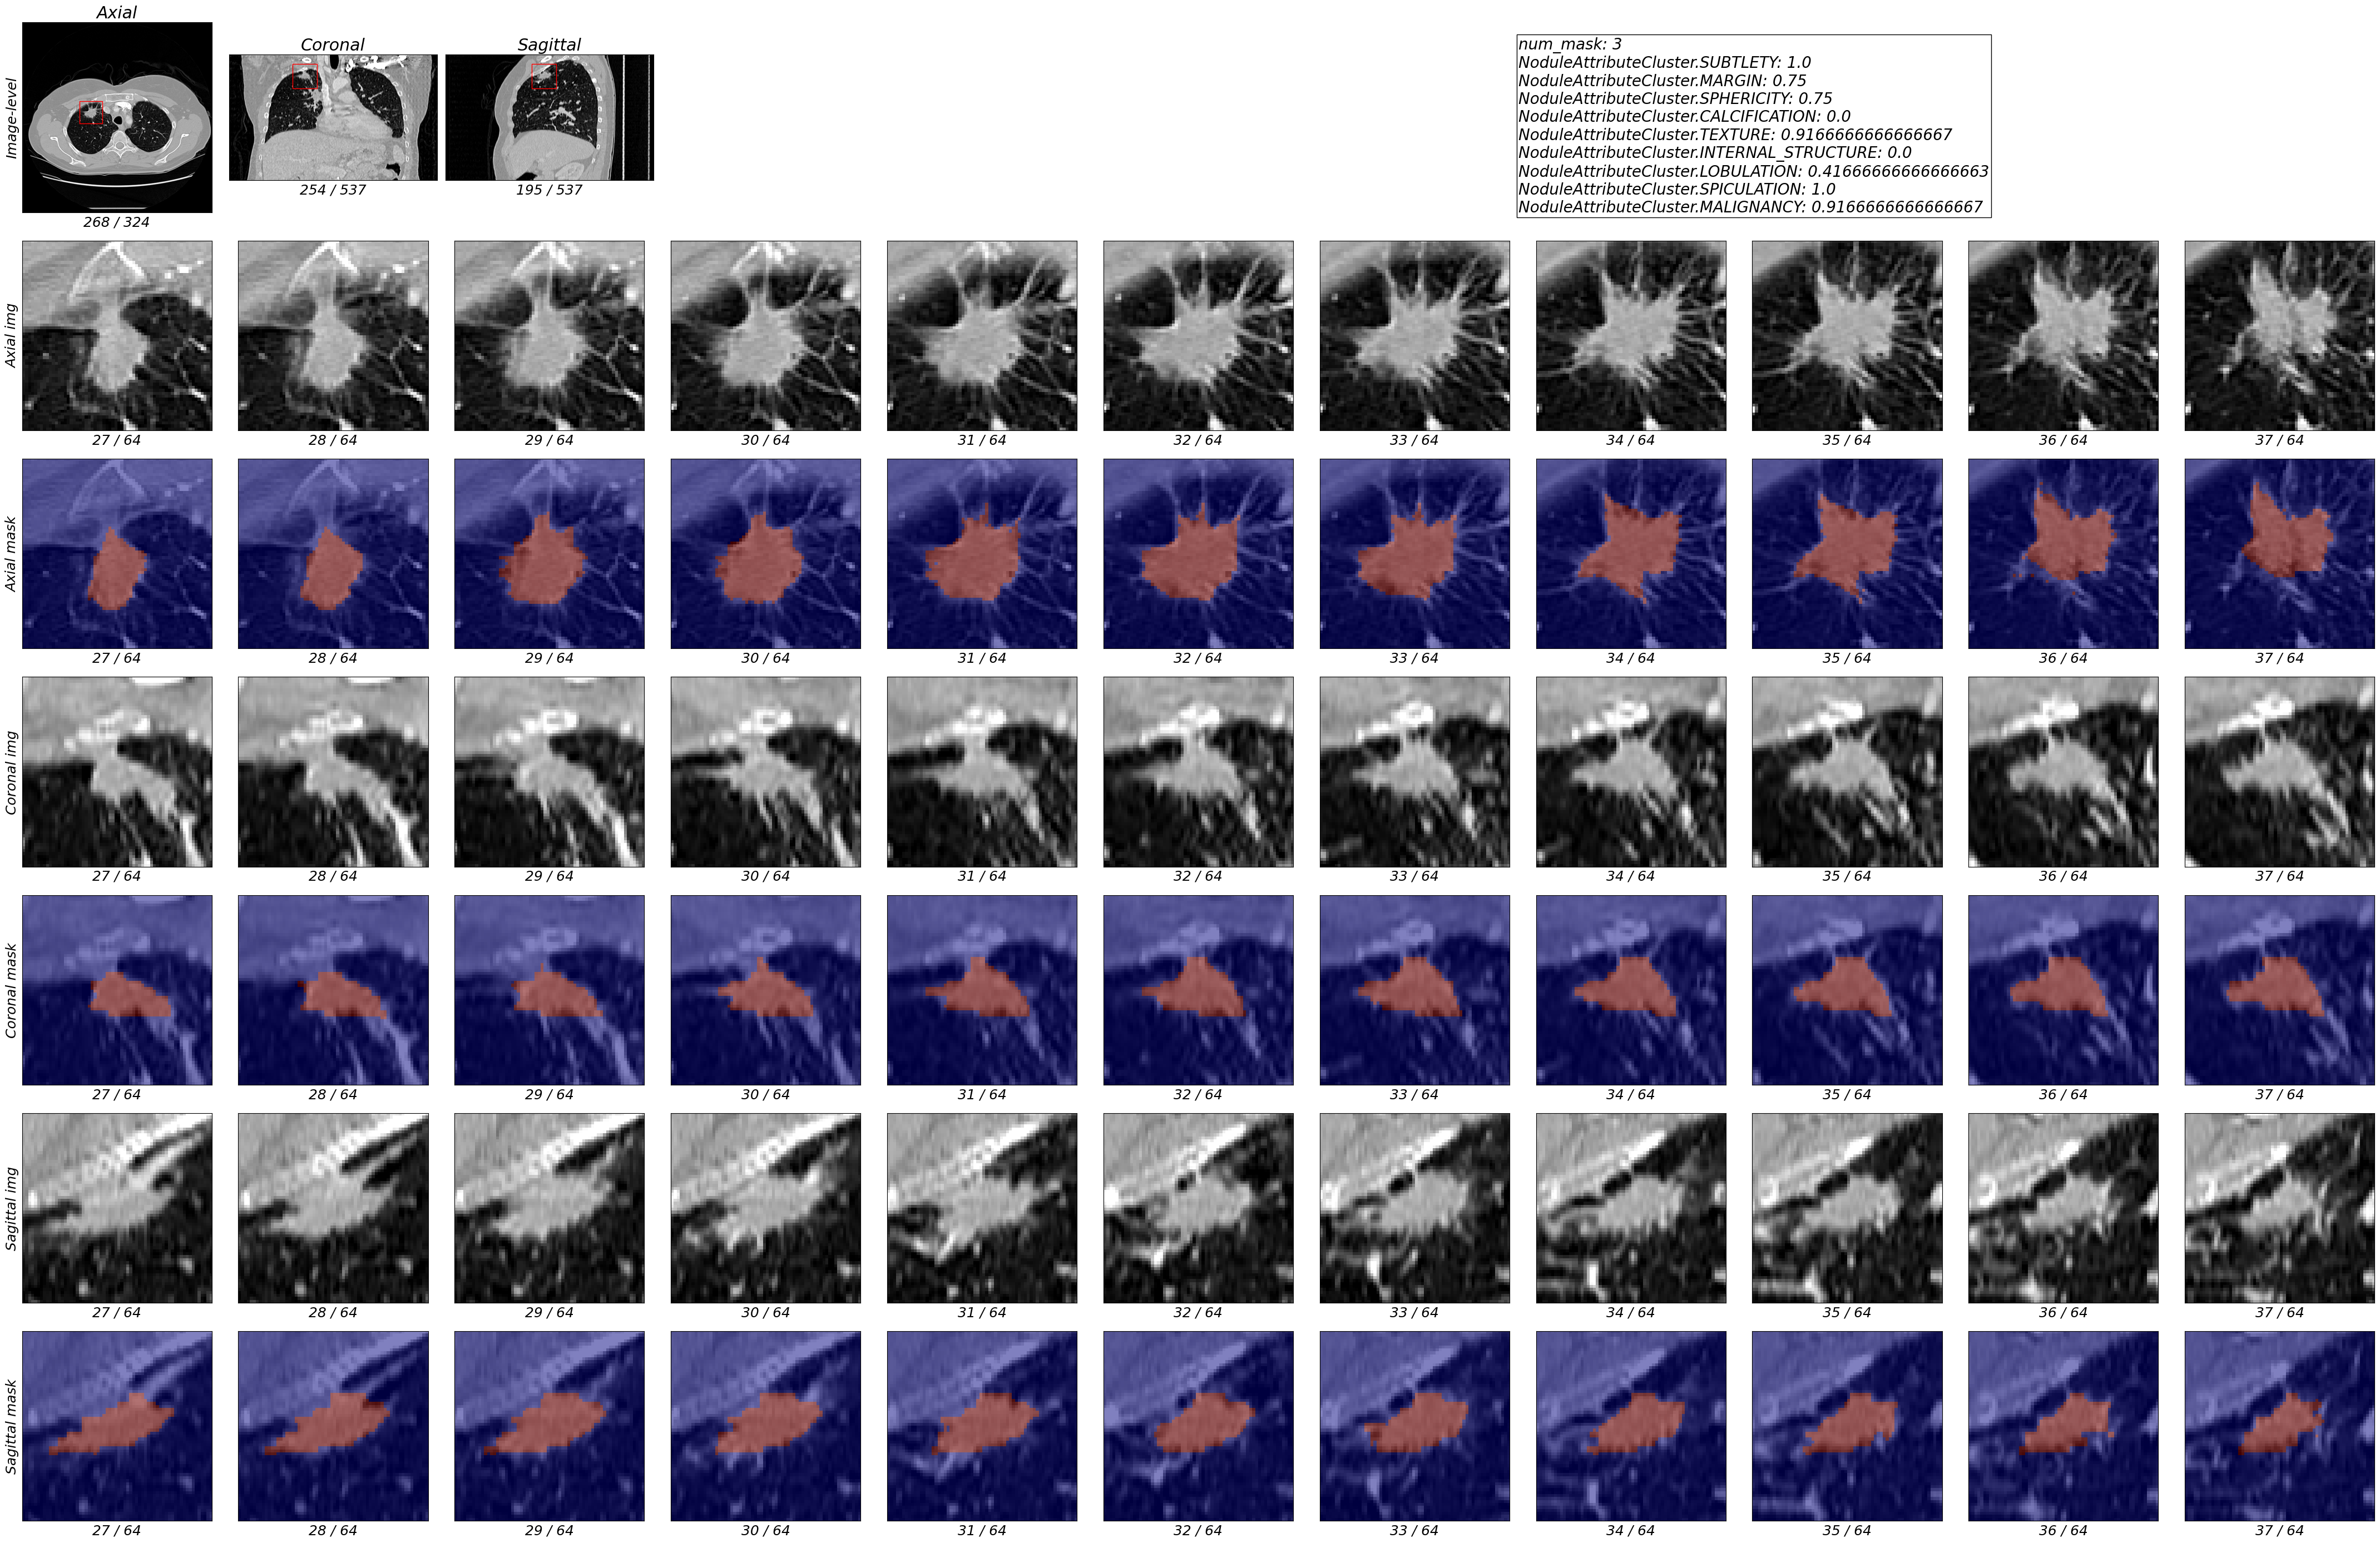

In [30]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )
fig

In [34]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.9
query = {
    "c_internalStructure_logistic": {"$gte": degree},
    "num_mask": {"$gte": 3},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

21


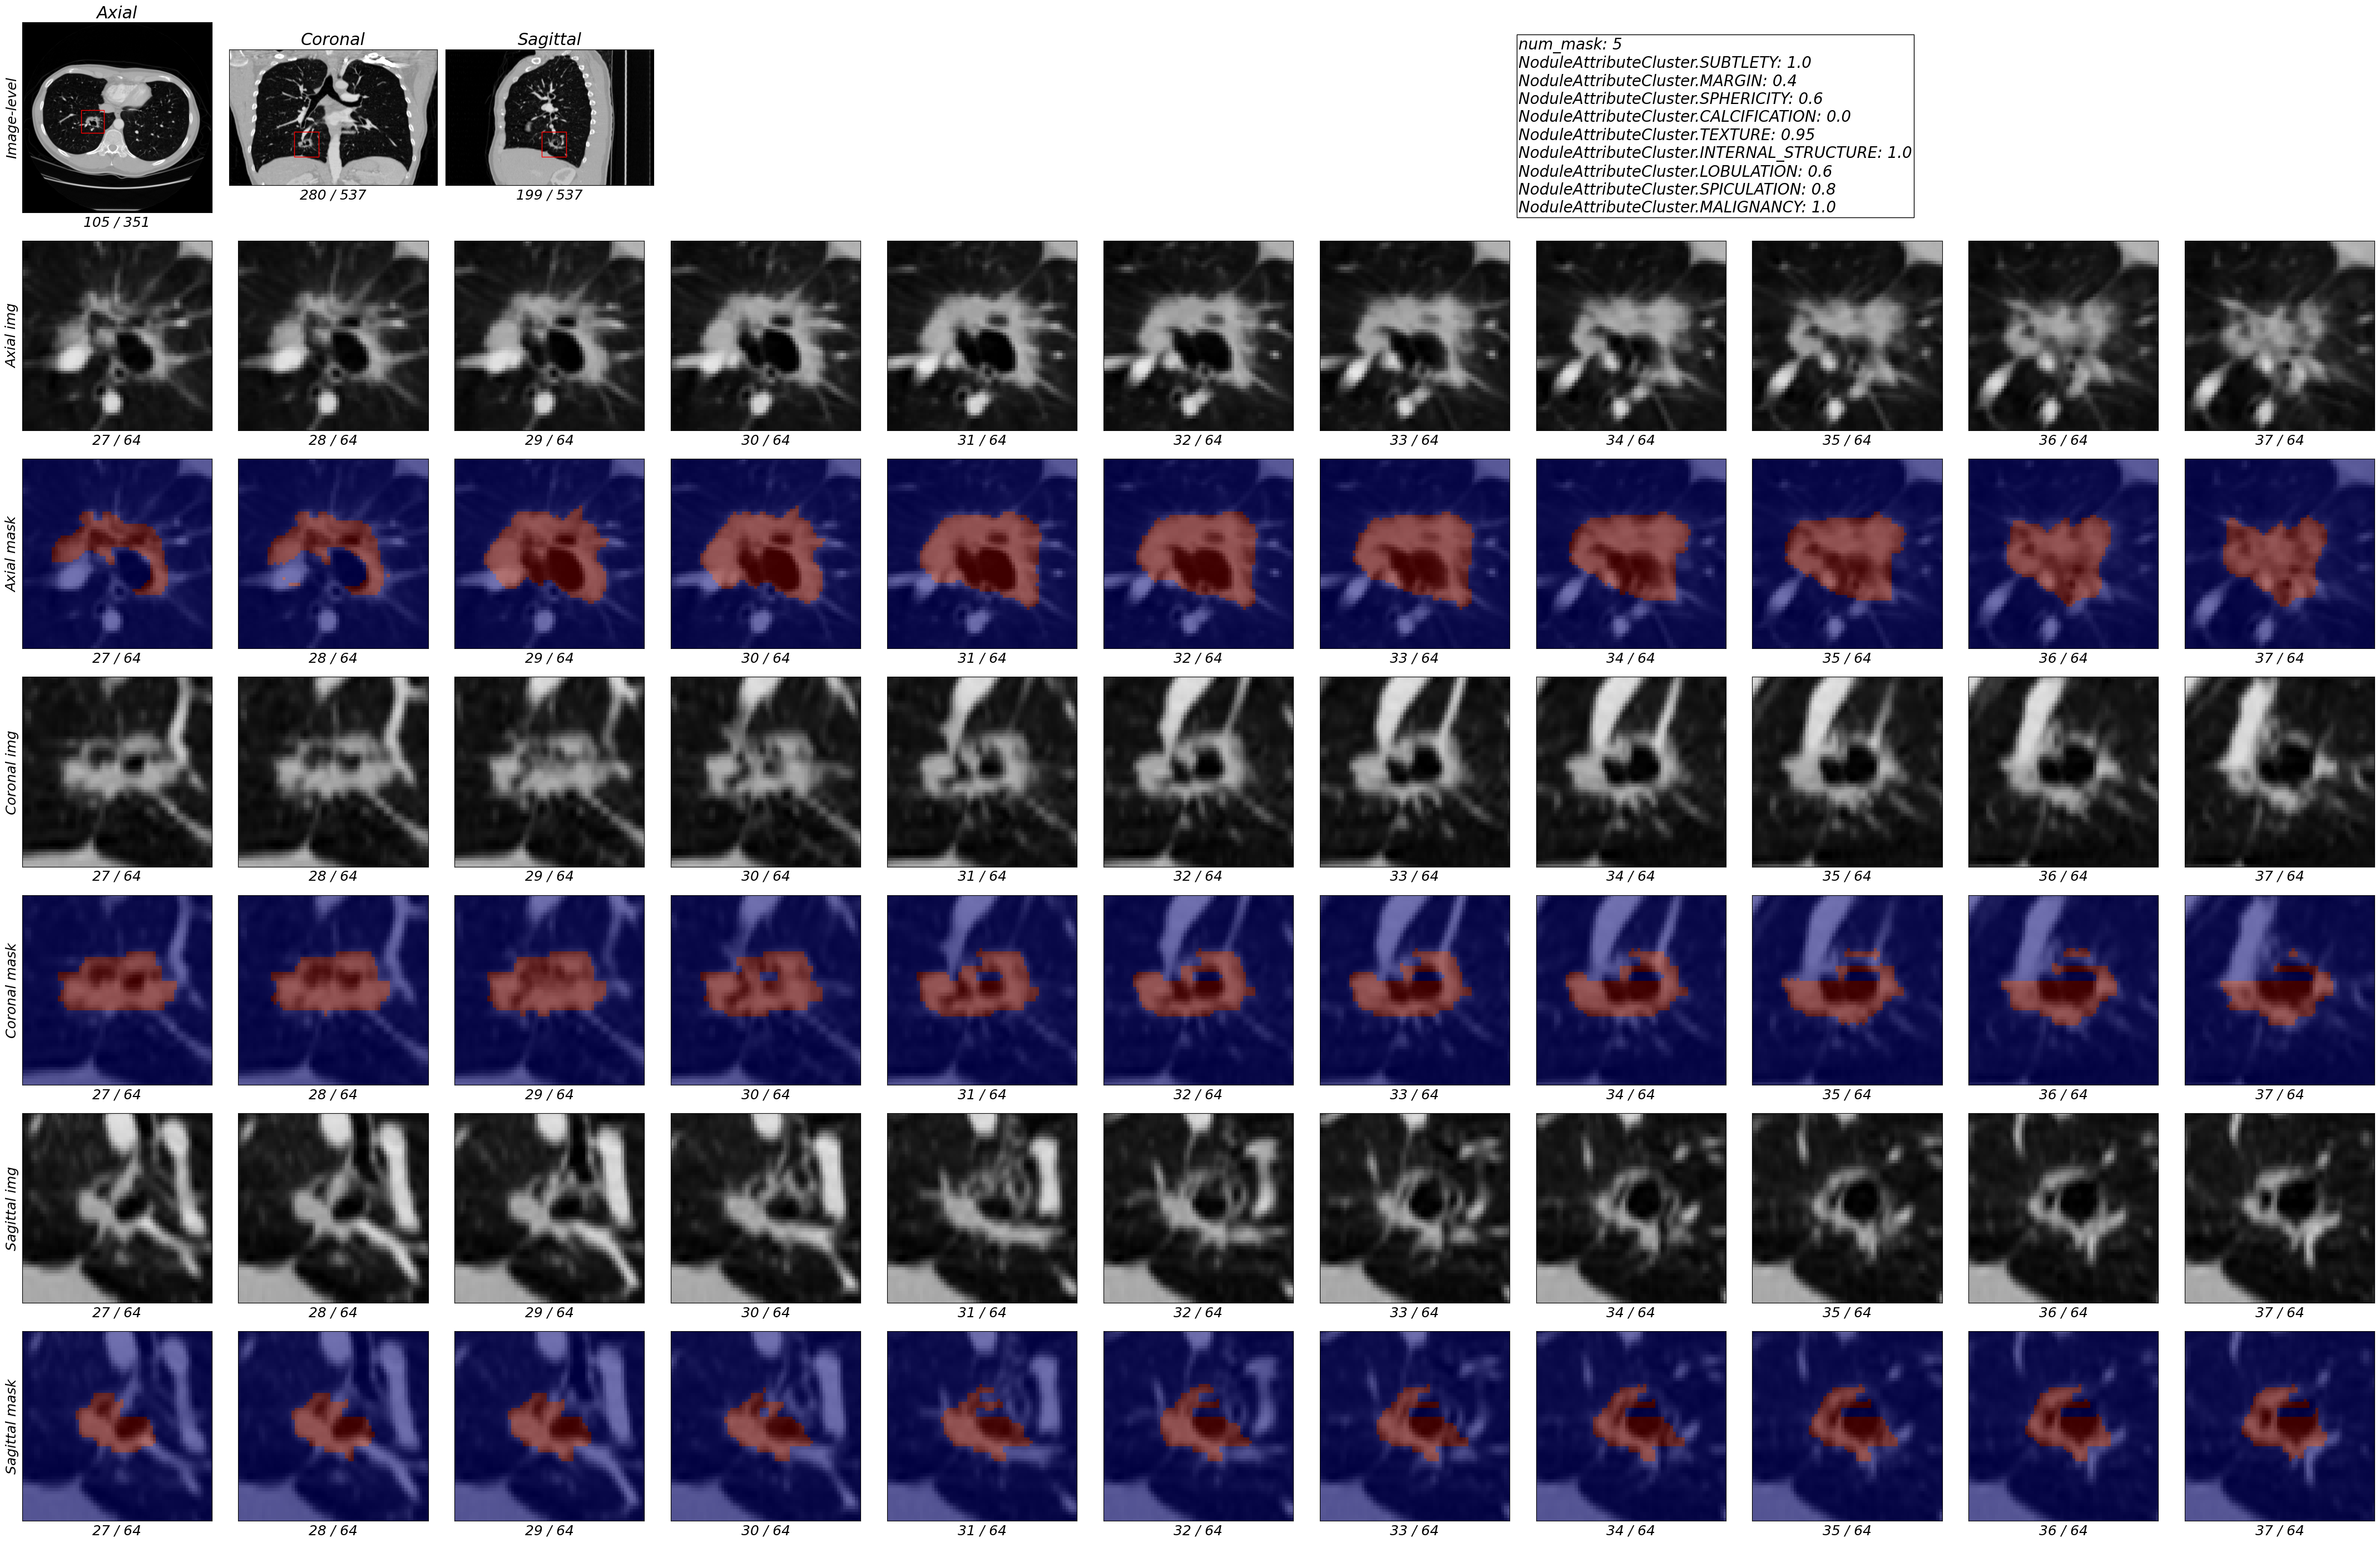

In [35]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )
fig

In [41]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.2
query = {
    "c_sphericity_logistic": {"$lte": degree},
    "num_mask": {"$gte": 2},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

3


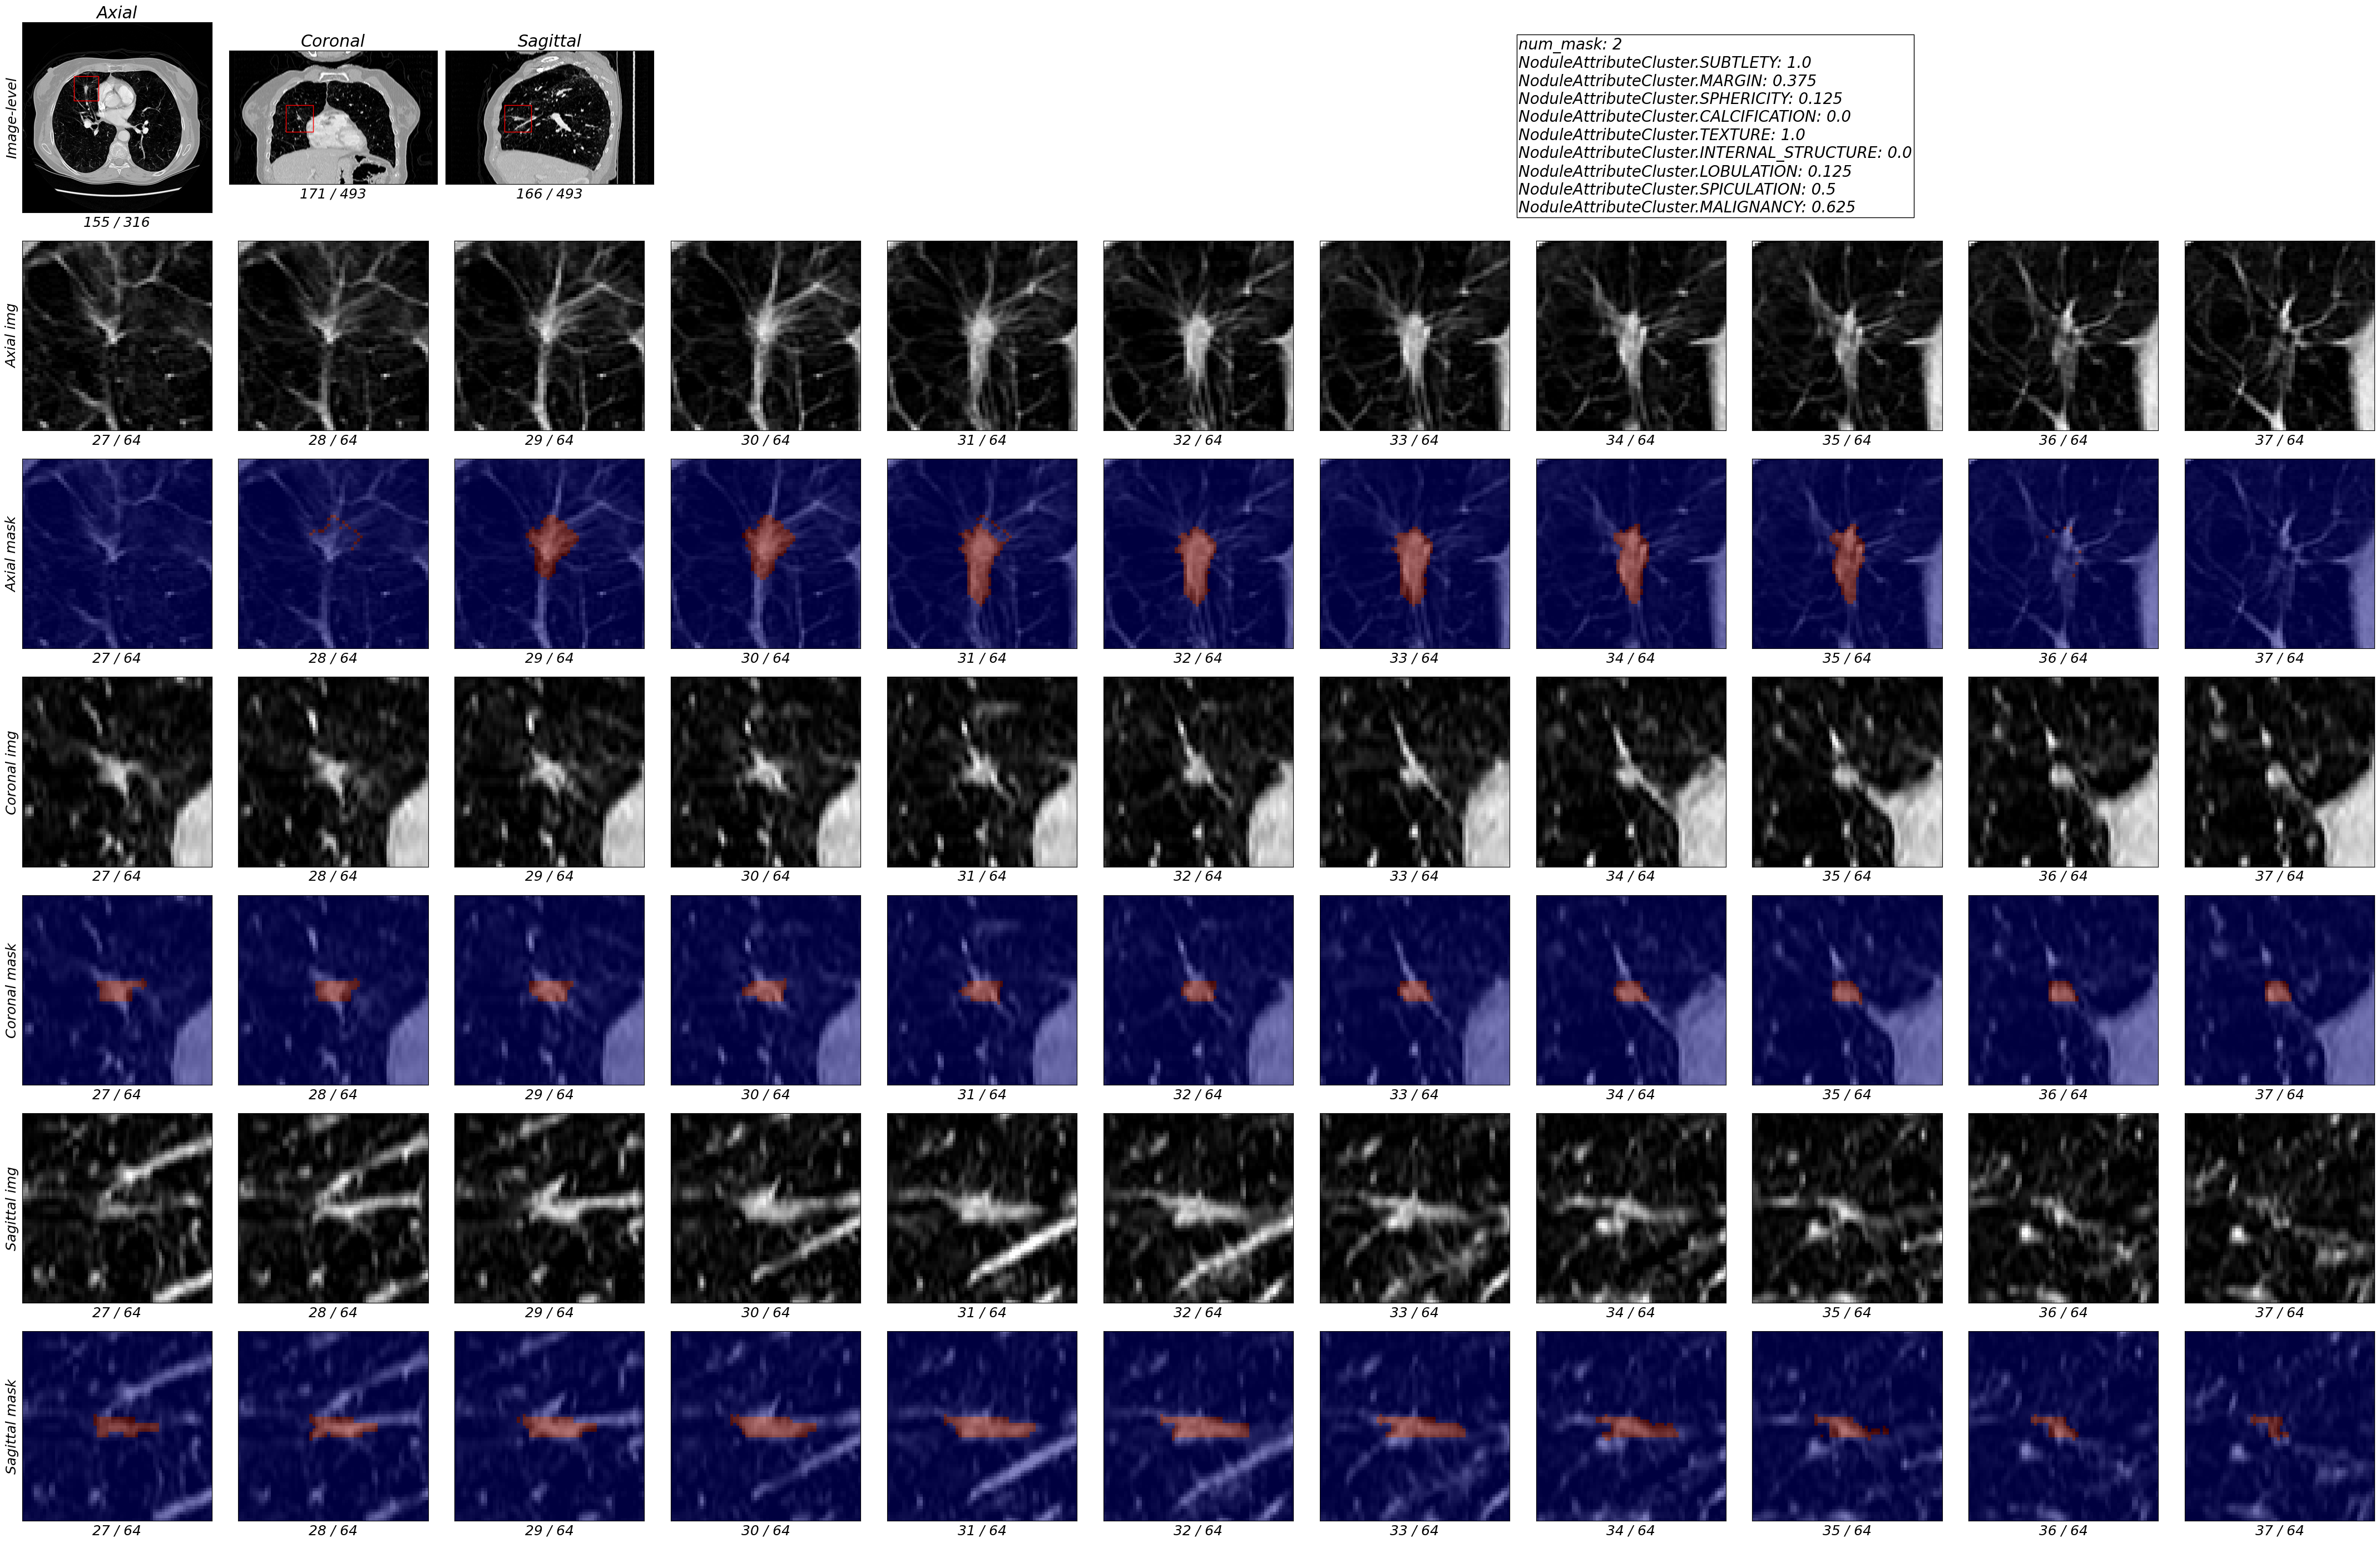

In [42]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )
fig

In [45]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.1
query = {
    "c_subtlety_logistic": {"$lte": degree},
    "num_mask": {"$gte": 3},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

6


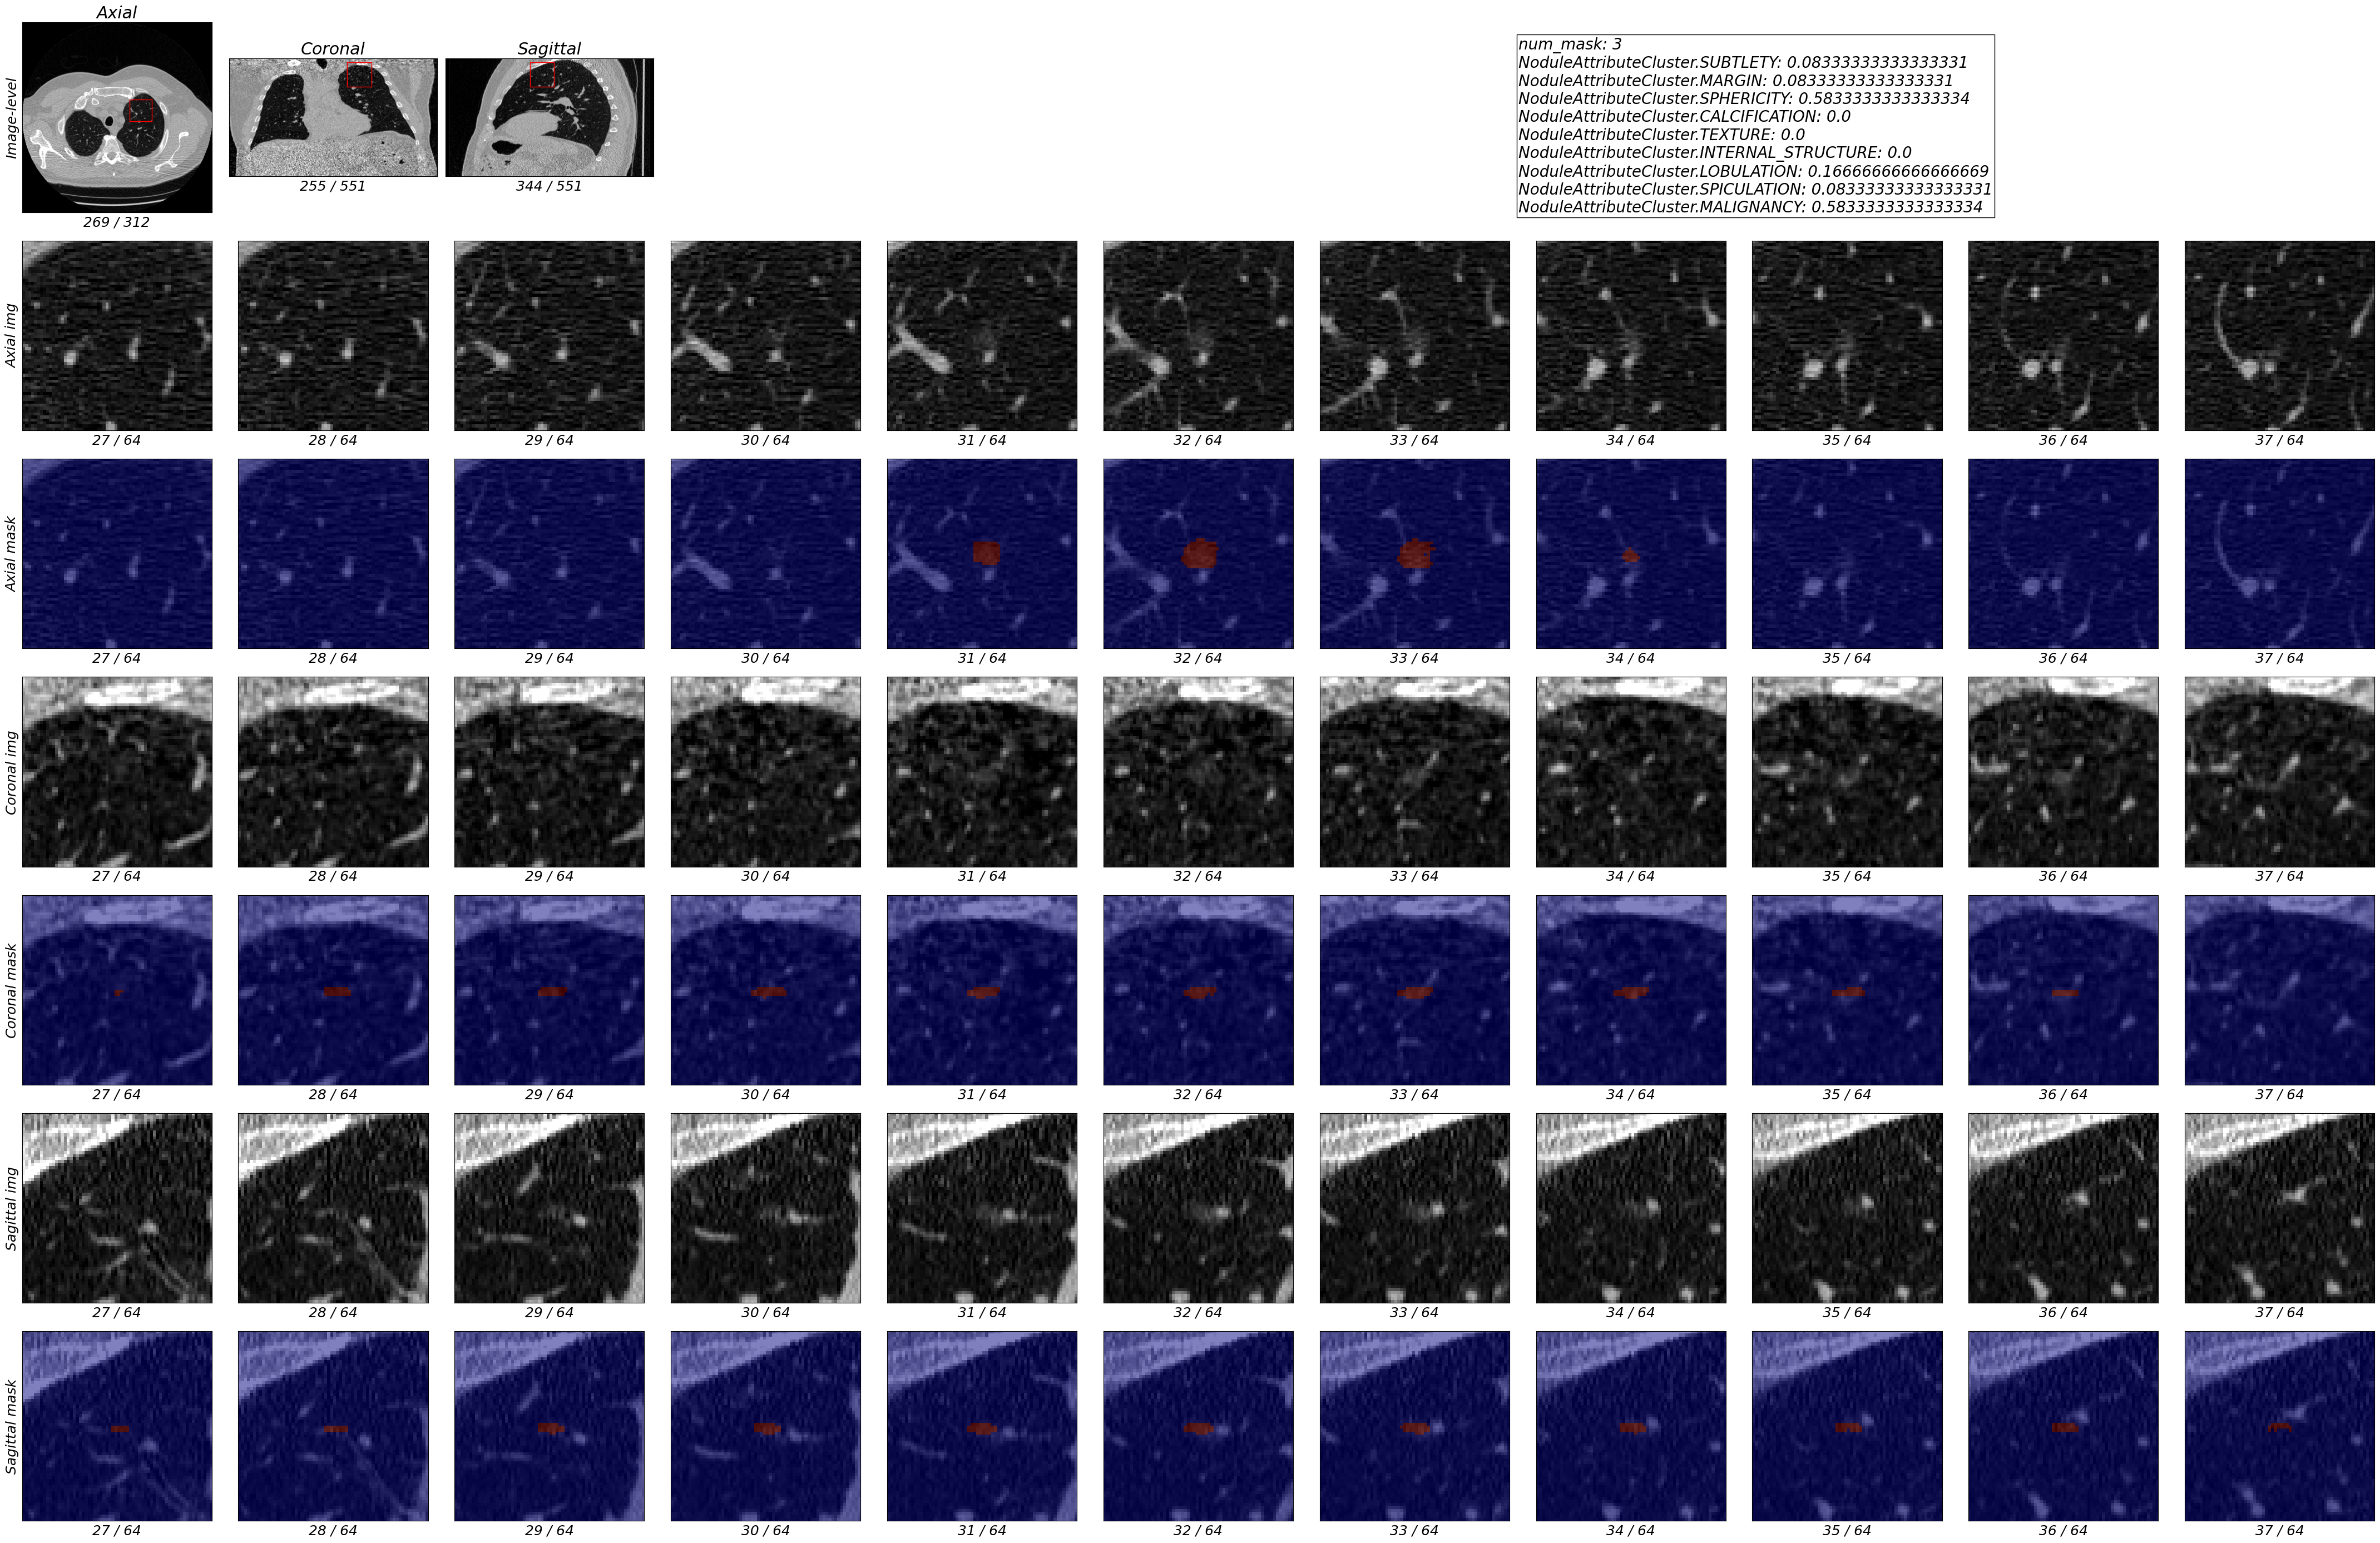

In [46]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )
fig

In [47]:
projection = {t: 1 for t in []}
projection["_id"] = 0  # do not show '_id' of documents

# set query
degree = 0.9
query = {
    "c_calcification_logistic": {"$gte": degree},
    "num_mask": {"$gte": 3},
}
data = [x for x in client[TARGET_DB][CollectionName.CLUSTER].find(query, projection)]
print(len(data))
target_data = data[0]

256


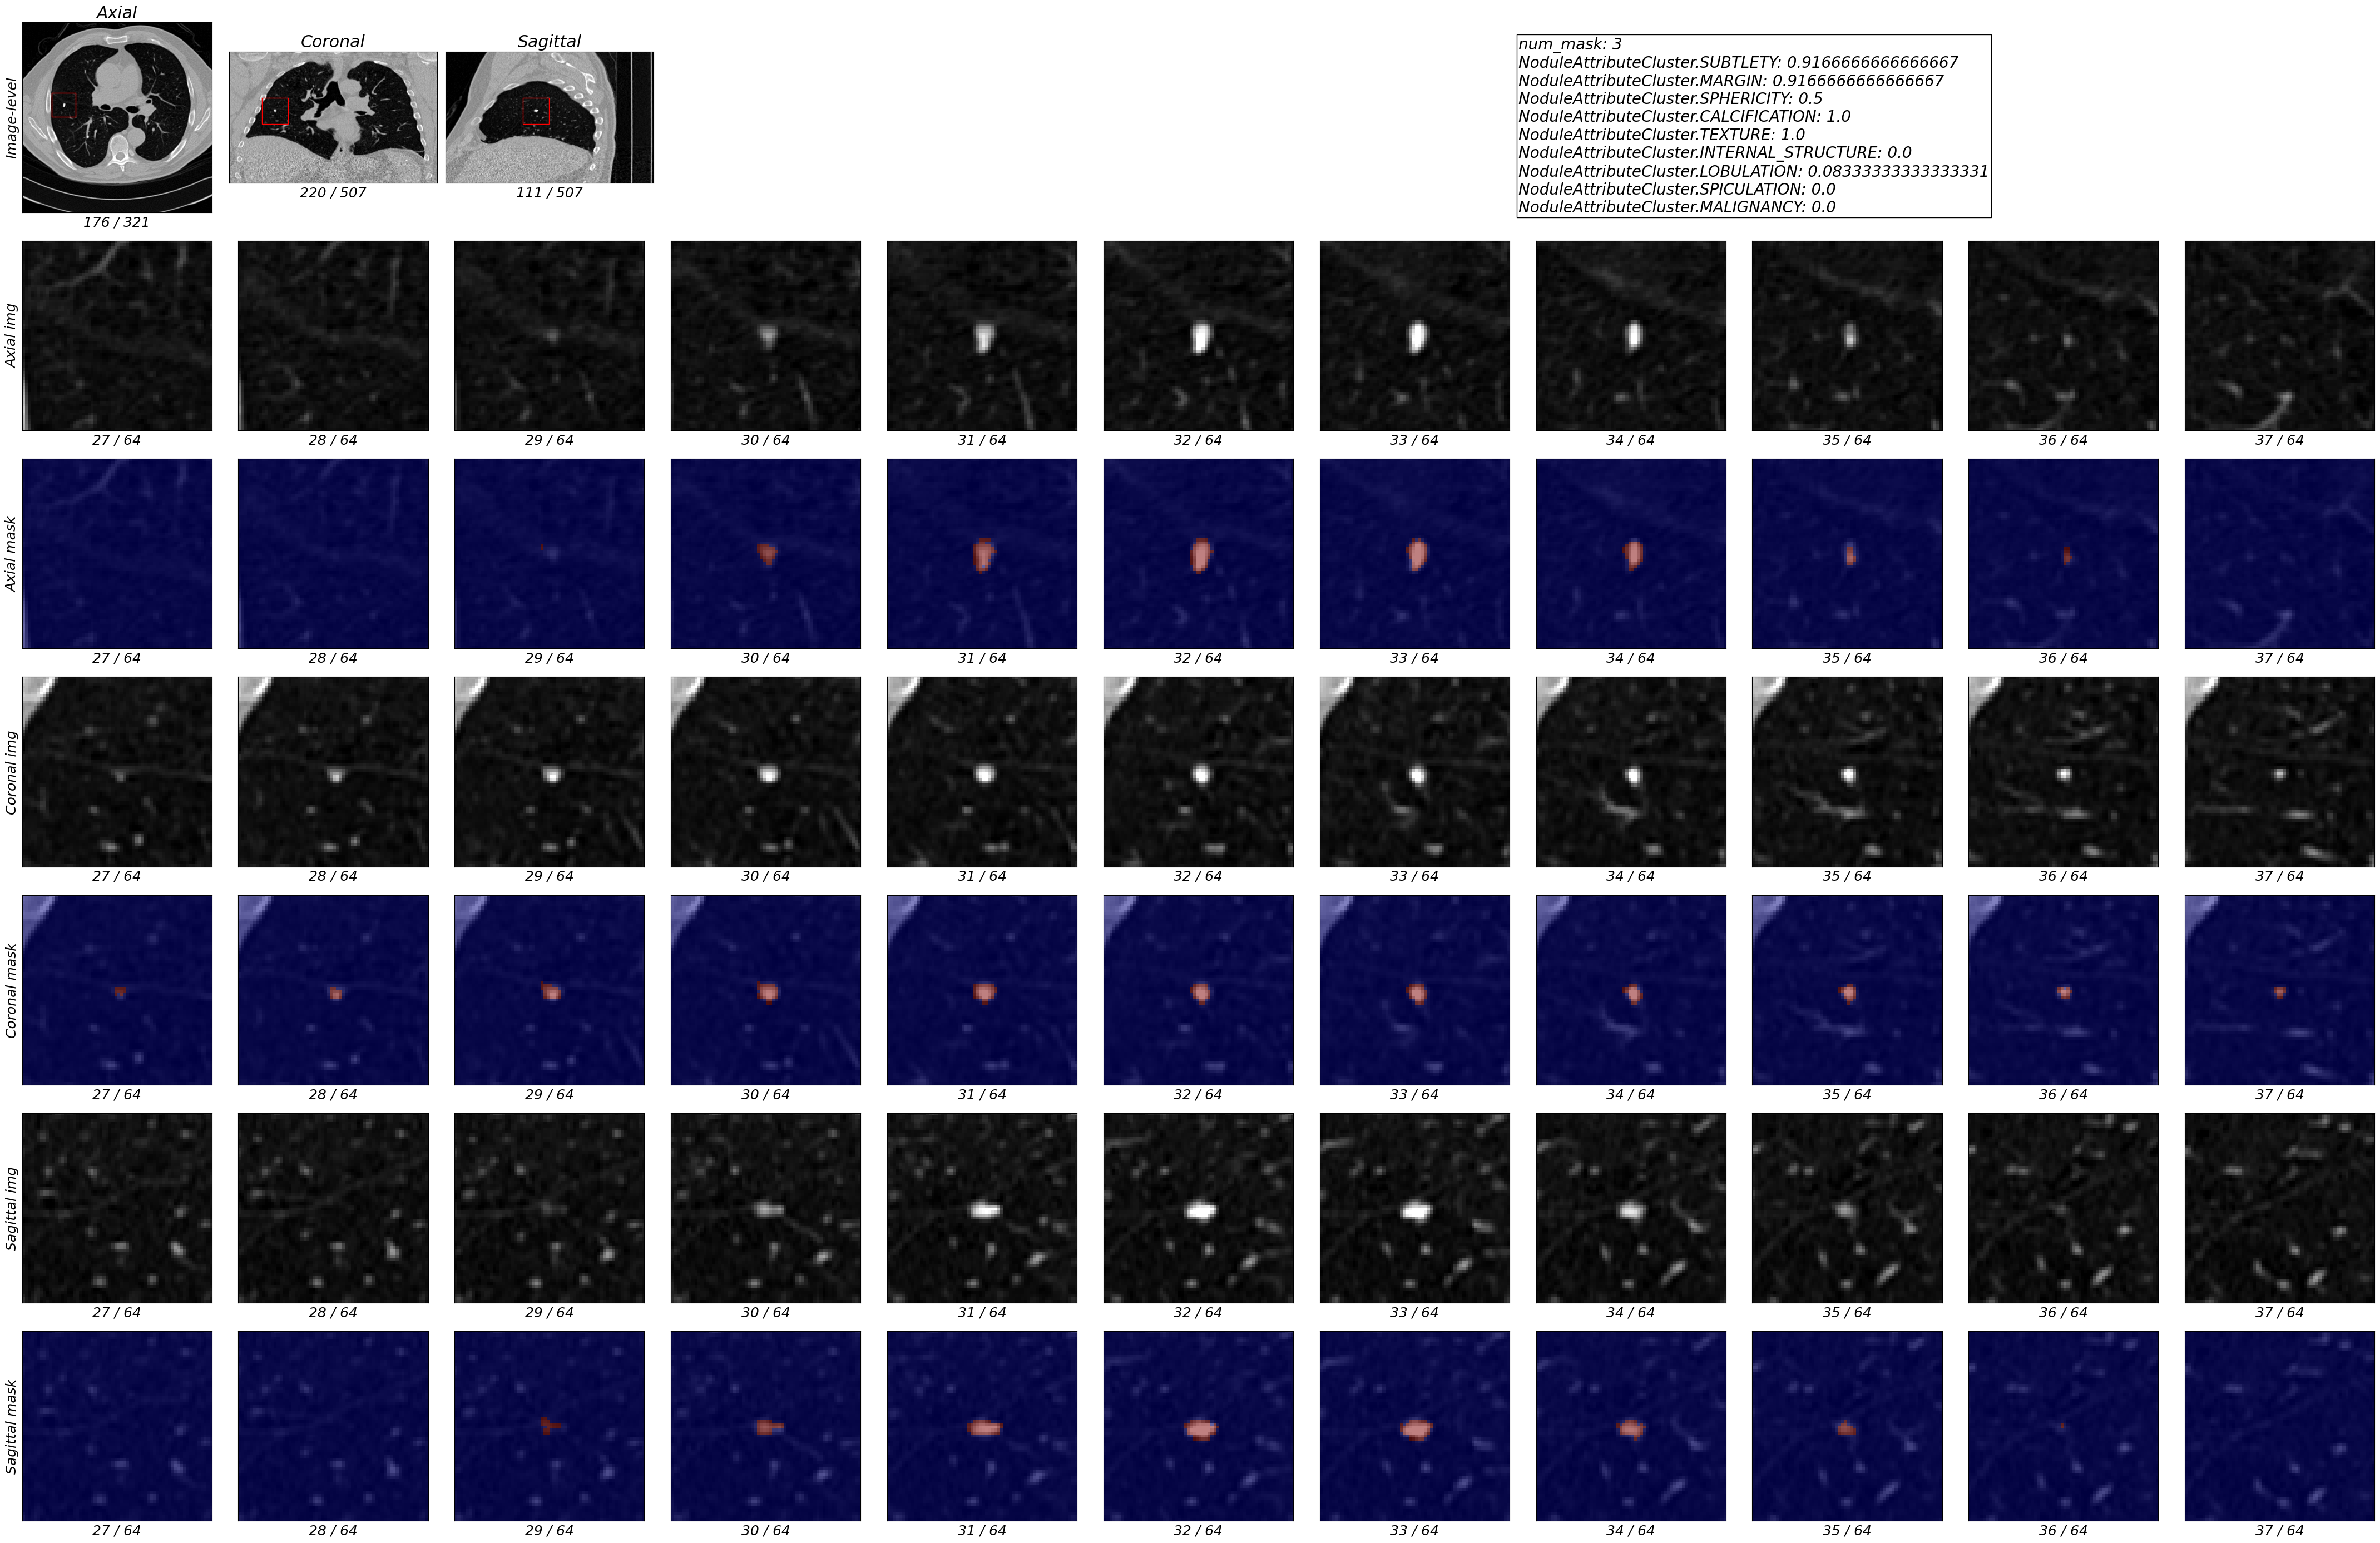

In [48]:
r_coord = target_data[ClusterLevelInfo.R_COORD_ZYX]
series_uid = target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.SEREIS_INSTANCE_UID]

figure_title = ""
attr = {ClusterLevelInfo.NUM_MASK: target_data[ClusterLevelInfo.NUM_MASK]}
for i_attr in NoduleAttributeCluster:
    attr[i_attr] = target_data[f"{i_attr.value}"]
    
_THRESHOLD = 0.5

with h5py.File(target_data[ClusterLevelInfo.DICOM_SERIES_INFO][ImageLevelInfo.H5_FILE_PATH]) as hfile:
    dicom_voxels = hfile[HFileKey.HFileAttrName.DICOM_PIXELS_RESAMPLED][:]
    if _THRESHOLD:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:] > _THRESHOLD
    else:
        mask = hfile[HFileKey.HFileAttrName.MASK_ANNOTATION_RESAMPLED][:]
    fig = save_plot(
        dicom_voxels,
        mask_image=mask,
        nodule_zyx=r_coord,
        figure_title=figure_title,
        meta=attr,
        use_norm=True,
        save_dir=None,
        dpi=60,
    )
fig